#Assignment 3
##ENV716- Fall 2022
---

Instructor: [Dalia Patino-Echeverri ](mailto:dalia.patino@duke.edu)

Author(s): [Xiaodong Zhang](mailto:xiaodong.zhang828@duke.edu), [Mauricio Hernandez](mailto:mmh54@duke.edu)

[Github repository](https://github.com/ENV716/Energy_Modeling_F2022)

##Objective: 

This assignment offers opportunities to:
- Practice extracting information of excel workbooks with Python
- Practice your ability to build a cost model in excel, and use macros to build useful applications.
- Become familiar with the AEI estimates of LCOE for electric power generation technologies.
- Practice ways to communicate uncertainty and variability on LCOE estimates
---


In [1]:
#import libraries
import pandas as pd # this imports the pandas library which is necessary for data frames and calls that library
 # can call all the functions of this library with "pd."
import numpy as np # same for numpy

In [2]:

#Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##1.(25%) Use Python to get information from eGRID20 about solar plants in NC

###1.a (5%) 
In Python, create a table with based on eGRID20, spreadsheet PLT20, that presents the following columns: Plant state abbreviation, Plant name, Plant primary fuel, and Plant nameplate capacity. Print the first 10 lines of the table to the screen and then print the last 10.

In [ ]:
###############################################################################################################
## FROM LUANA's LAB code Below we:
## 1. Read eGRID20 file directly form EPA website
## Read the PLNT20 sheet of the excel file into a pandas DataFrame.
## A DataFrame is a two-dimensional labeled data structure with columns of potentially different types
## Specify that the headers are on the second row of the excel file (i.e., row 1 in Python)
## 2. Confirm we read all columns by printing the first five rows
###############################################################################################################

df_plnt =pd.read_excel("https://www.epa.gov/system/files/documents/2022-01/egrid2020_data.xlsx", 
                       sheet_name="PLNT20",keep_default_na=False,header=1)

#The only two paramters necessary for this are 1) The excel file and 2.The sheet name
#the other two parameters are optional but helpful. 3)Telling python to not use the "NA" fo
#4) specifying that the header is in row 1 (row 1 is in fact the second row of the spreadsh
#because python always starts counting at 0
df_plnt.head(5) 

,SEQPLT20,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
0,1,2020,AK,7-Mile Ridge Wind Project,60814,Alaska Power and Telephone Co,219,Alaska Power and Telephone Co,219,Electric Utility,...,,,,,,,,,,
1,2,2020,AK,Agrium Kenai Nitrogen Operations,54452,Homer Electric Assn Inc,19558,Agrium US Inc,179,Industrial CHP,...,,,,,,,,,,
2,3,2020,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,,,,,,,,,,
3,4,2020,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
4,5,2020,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#Name of columns
#Plant state abbreviation:PSTATABB
#Plant name: PNAME
#Plant primary fuel: PLFUELCT
#Plant nameplate capacity: NAMEPCAP

#Maybe not necessary, but to be sure it is numeric
df_plnt.NAMEPCAP=pd.to_numeric(df_plnt.NAMEPCAP)

#Select only the attributes required, the copy function is recommended, the code 
# works without this function
df_plnt_summ = df_plnt.loc[:,['PSTATABB','PNAME','PLPRMFL','NAMEPCAP']].copy()

#Print first 10 plants
print(df_plnt_summ.head(n=10))

  PSTATABB                             PNAME PLPRMFL  NAMEPCAP
0       AK         7-Mile Ridge Wind Project     WND       1.8
1       AK  Agrium Kenai Nitrogen Operations      NG      21.6
2       AK                          Alakanuk     DFO       2.6
3       AK               Allison Creek Hydro     WAT       6.5
4       AK                            Ambler     DFO       1.5
5       AK                       Anchorage 1      NG     121.4
6       AK                            Angoon     DFO       1.9
7       AK                             Aniak     DFO       2.6
8       AK                       Annex Creek     WAT       4.0
9       AK                          Auke Bay     DFO      36.2


In [ ]:
#print last 10 plants
print(df_plnt_summ.tail(n=10))

      PSTATABB                               PNAME PLPRMFL  NAMEPCAP
12658       WY                         Swift Creek     WAT       2.5
12659       WY                            TB Flats     WND     503.2
12660       WY  Top of the World Windpower Project     WND     200.0
12661       WY              TransAlta Wyoming Wind     WND     144.0
12662       WY            Two Rivers Wind Facility     WND     290.0
12663       WY     Western Sugar Coop - Torrington      NG       2.0
12664       WY                             Wygen I     SUB      90.0
12665       WY                            Wygen II     SUB      95.0
12666       WY                           Wygen III     SUB     116.0
12667       WY                              Wyodak     SUB     402.3


### 1.b (10%) 
using the table created in part a) find the total installed capacity of solar plants in CA (i.e., include plants whose primary fuel is SUN and are located in California). 

In [ ]:
#1. From the summary table obtained in 1.a, the solar plants are selected
# To see the values of the type of fuel: df_plnt_summ.PLPRMFL.unique()
df_plnt_sun = df_plnt_summ[(df_plnt_summ.PLPRMFL == 'SUN')].copy()
#2. Then from the solar plants, the ones located in CA are selected 
df_plnt_sun_ca = df_plnt_sun[(df_plnt_sun.PSTATABB == 'CA')].copy()
#3. Obtain the total installed capacity of the solar plants in CA
total_cap_sun_ca = df_plnt_sun_ca.NAMEPCAP.sum()

#The above calculations can be done in one line
#total_cap_sun_ca = df_egrid_plnt_summ[(df_egrid_plnt_summ.PLPRMFL == 'SUN') &(df_egrid_plnt_sun.PSTATABB == 'CA')]['NAMEPCAP'].sum()

#Display results
print("Total installed capacity of the solar plants in CA: {:,.2f} MW".format(total_cap_sun_ca)) # display the result as a float with 2 decimal places

Total installed capacity of the solar plants in CA: 19,121.00 MW


### 1.c (10%) 
using the table created in part a) find the average installed capacity of solar plants in CA (i.e., include plants whose primary fuel is SUN and are located in California).

In [ ]:
#Similar procedure to the one done in 1.b), but using function mean()
#Obtain the average installed capacity of the solar plants in CA
avg_cap_sun_ca = df_plnt_sun_ca.NAMEPCAP.mean()

#The above calculations can be done in one line
#avg_cap_sun_ca = df_egrid_plnt_summ[(df_egrid_plnt_summ.PLPRMFL == 'SUN') &(df_egrid_plnt_sun.PSTATABB == 'CA')]['NAMEPCAP'].mean()

#Display results
print("Average installed capacity of the solar plants in CA: {:.2f} MW".format(avg_cap_sun_ca))

Average installed capacity of the solar plants in CA: 26.41 MW


###1.d (5%) 
What percentage of the 2020 U.S. solar PV production was generated in CA? Print a statement with this information to the screen.

In [ ]:
#Name of columns
#Plant annual net generation:PLNGENAN

#Maybe not necessary, but to be sure it is numeric
df_plnt.PLNGENAN=pd.to_numeric(df_plnt.PLNGENAN)

# Select solar plants located in CA
df_plnt_sun_ca = df_plnt[(df_plnt.PLPRMFL == 'SUN') & (df_plnt.PSTATABB == 'CA')].copy()

#Obtain the total solar PV production in US
total_gen_sun_us = df_plnt[(df_plnt.PLPRMFL == 'SUN')].PLNGENAN.sum()
#Obtain the total solar PV production in CA
total_gen_sun_ca = df_plnt_sun_ca.PLNGENAN.sum()
#Calculate what percentage of the 2020 U.S. solar PV production was generated in CA?
total_gen_sun_pct = total_gen_sun_ca/(total_gen_sun_us)

#Display results
print("The percentage of the 2020 U.S. solar PV production generated in CA is: {:,.2%}".format(total_gen_sun_pct))

The percentage of the 2020 U.S. solar PV production generated in CA is: 33.78%


## 2.(15%) Summarize information on U.S. power plants dispatched within the PJM market using the PLNT20 spreadsheet from eGRID20 

*(i.e., Column L, Balancing Authority Code, is PJM.)*

### 2.a. (5%) 
What is the total installed capacity (in MW) of power plants dispatched by PJM?


In [ ]:
#1. Select only the plants dispatched by PJM, using attribute Balancing 
#   Authority Code "BACODE"
df_plnt_pjm = df_plnt[(df_plnt.BACODE == 'PJM')]

#2. Add the installed capacity of all the PJM's plants
total_cap_pjm = df_plnt_pjm.NAMEPCAP.sum()

#Display results
print("Total installed capacity of the power plants dispatched by PJM: {:,.2f} MW".format(total_cap_pjm))

Total installed capacity of the power plants dispatched by PJM: 293,782.80 MW


###2.b. (10%) 
What is the total installed capacity (in MW) and total electricity generation from power plants of different fuels?  Fill out the following table.

In [ ]:
pd.options.mode.chained_assignment = None 
#convert to a numerical type of data
df_plnt_pjm.PLNGENAN = pd.to_numeric(df_plnt_pjm.PLNGENAN)

#Select attributes nameplate capacity, generation and type of fuel
# to create pivot table
pt_pjm = pd.pivot_table(df_plnt_pjm,index="PLFUELCT",values=["PLNGENAN", "NAMEPCAP"], aggfunc='sum')
print(pt_pjm)

          NAMEPCAP      PLNGENAN
PLFUELCT                        
            6467.2  0.000000e+00
BIOMASS     2728.7  1.020180e+07
COAL       73875.7  1.463125e+08
GAS       122072.4  3.159887e+08
HYDRO       8624.2  8.154622e+06
NUCLEAR    36040.2  2.757495e+08
OFSL          62.5  7.659700e+04
OIL        14647.0  3.539786e+06
OTHF        2318.3  2.422018e+06
SOLAR      10125.3  6.031438e+06
WIND       16821.3  2.623911e+07


In [ ]:
# According to the documentation from egrid (page 52 and 53):
# https://www.epa.gov/system/files/documents/2022-01/egrid2020_technical_guide.pdf
# this is the classification
'''
Classification
Other: OFSL, OIL, OTHF
'''
#1. Estimate capacity and generation of other type of fuels
#1.1 Create list of other types of fuels
list_other = ['OFSL', 'OIL', 'OTHF']
#1.2 Add values of nameplate capacity and generation 
#for the type of fuels 'OFSL', 'OIL', 'OTHF'
capac_other = pt_pjm.loc[list_other,'NAMEPCAP'].sum()
gen_other = pt_pjm.loc[list_other,'PLNGENAN'].sum()

#2. Add row (new record) to dataframe
pt_pjm.loc['OTHER'] = {'NAMEPCAP': capac_other, 'PLNGENAN': gen_other}

#3. Drop rows that are not needed (the ones that are in the list other)
pt_pjm.drop(list_other, inplace= True)

pt_pjm

,NAMEPCAP,PLNGENAN
PLFUELCT,,
,6467.2,0.000000e+00
BIOMASS,2728.7,1.020180e+07
COAL,73875.7,1.463125e+08
GAS,122072.4,3.159887e+08
HYDRO,8624.2,8.154622e+06
NUCLEAR,36040.2,2.757495e+08
SOLAR,10125.3,6.031438e+06
WIND,16821.3,2.623911e+07
OTHER,17027.8,6.038401e+06


In [ ]:
#4. Estimate percentage of total capacity per fuel
# This is done by dividing the nameplate capacity of each type of fuel by the 
# sum of all the nameplate capacities. Same for generation.
# The results are multiplied by 100 to get percentages
pt_pjm["PERC_TOT_CAPACITY"] = 100*(pt_pjm.NAMEPCAP / pt_pjm.NAMEPCAP.sum())
pt_pjm["PERC_TOT_GENERATION"] = 100*(pt_pjm.PLNGENAN / pt_pjm.PLNGENAN.sum())

#5. Add row with totals
pt_pjm.loc['Total'] = 0 # set initially to zero
pt_pjm.loc['Total'] = pt_pjm.sum()

#Show only the results requested, in the order of the assignment
pt_pjm[['NAMEPCAP', "PERC_TOT_CAPACITY", 'PLNGENAN',"PERC_TOT_GENERATION"]]

,NAMEPCAP,PERC_TOT_CAPACITY,PLNGENAN,PERC_TOT_GENERATION
PLFUELCT,,,,
,6467.2,2.201354,0.000000e+00,0.000000
BIOMASS,2728.7,0.928815,1.020180e+07,1.283704
COAL,73875.7,25.146367,1.463125e+08,18.410657
GAS,122072.4,41.551922,3.159887e+08,39.761208
HYDRO,8624.2,2.935570,8.154622e+06,1.026105
NUCLEAR,36040.2,12.267634,2.757495e+08,34.697868
SOLAR,10125.3,3.446526,6.031438e+06,0.758942
WIND,16821.3,5.725761,2.623911e+07,3.301697
OTHER,17027.8,5.796051,6.038401e+06,0.759819


*There are some plants that don't have any classification by fuel type and didn't produce any electricity, these could be included in the OTHER category, if this is done OTHER will be 6467.2MW + 17027.8MW = 23495.0 MW*

##3.(10%) Summarizing information about specific set of power plants participating in the PJM market (Use PLNT20 spreadsheet from eGRID20 
**(i.e., Column K, Balancing Authority Code, is PJM.)**

Create a subset of power plants that contains only those plants with the following characteristics: 
- Column L, Balancing Authority Code, is PJM.
- Column Y, Plant primary coal/oil/gas/ other fossil fuel category, is equal to Coal or Gas. 
- Column AA, Plant capacity factor, is 0.05 or greater. 
- Column AB, Plant nameplate capacity (MW), is 10 or more. 


In [ ]:
#0. Change Capacity factor to numeric, probably not needed
df_plnt.CAPFAC = pd.to_numeric(df_plnt.CAPFAC)
df_plnt.NAMEPCAP = pd.to_numeric(df_plnt.NAMEPCAP)

#1. Create masks to filter the plants by 

#1.1 Authority Code = "PJM". Attribute BACODE, column L could also be used
mask_pjm = (df_plnt.BACODE == 'PJM')
#1.2 Plant primary coal/oil/gas/
mask_type_fuel = (df_plnt.PLFUELCT == 'COAL') | (df_plnt.PLFUELCT == 'GAS')

#1.3 Capacity factor >= 0.05
mask_cf = (df_plnt.CAPFAC >= 0.05)
#1.4 Nameplate capacity >= 10 MW
mask_plate_capac = (df_plnt.NAMEPCAP >= 10) 

# Apply all filters
df_plnt_sub = df_plnt[mask_pjm & mask_type_fuel & mask_cf & mask_plate_capac]
#print("Number of plants after applying filters: ", df_plnt_sub.shape[0])
df_plnt_sub[['BACODE', 'PLFUELCT','CAPFAC','NAMEPCAP']].head()

,BACODE,PLFUELCT,CAPFAC,NAMEPCAP
2682,PJM,GAS,0.52325,10.8
2703,PJM,GAS,0.08436,118.0
2705,PJM,GAS,0.49953,361.0
2714,PJM,GAS,0.93491,25.0
3798,PJM,GAS,0.08080,1086.2


##3.a. (5%) What is the total installed capacity (in MW) from this subset of plants?



In [ ]:
#Add the installed capacity of the plants in the subset
total_cap = df_plnt_sub.NAMEPCAP.sum()

#Display results
print("Total installed capacity: {:,.2f} MW".format(total_cap))

Total installed capacity: 125,979.60 MW


###3.b. (5%) What is the average capacity factor of this subset of plants?

In [ ]:
#Obtain the average capacity factor of  the plants in the subset
total_cap = df_plnt_sub.CAPFAC.mean()

#Display results
print("Average capacity factor: {:.2f}".format(total_cap))

Average capacity factor: 0.39


##4.(20%) 
Use Excel or Python to summarize graphically the LCOE data used by the EIA in the AEO 2022. 
Graph a breakout of AEO 2022 LCOE values for new units entering service in 2027, along with error bars representing regional variability. The data is contained in tables 1A, 1B and 2 of the AEO document that you read for L2, available at https://www.eia.gov/outlooks/aeo/pdf/electricity_generation.pdf. The graph should look similar to the one below. A video with detailed instructions to build this graph in excel is posted with this assignment. Write a couple of sentences commenting on the LCOE composition and regional variability for a couple of technologies that are interesting to you.

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
pd.set_option('display.max_columns',None)

#access path where workbook is stored
path = "/content/gdrive/MyDrive/ENV716_F22_Solutions/A03/"

#Read file
df_LCOE =pd.read_excel(path + "LCOE Graphs from AEO2022 - error bars.xlsx", 
                        sheet_name="Combining 1b&2 2019",keep_default_na=False, header=0, index_col=0)

df_LCOE.head()

,Levelized capital cost,Levelized fixed O&M,Levelized variable O&M,Levelized transmission cost,Total system LCOE,Min,Max,Error value_Negative,Error value_Positive
Plant type,,,,,,,,,
Ultra-supercritical coal,52.11,5.71,23.67,1.12,82.61,73.86,101.25,8.75,18.64
Combined cycle,9.36,1.68,27.77,1.14,39.94,34.30,50.09,5.64,10.15
Advanced nuclear,60.71,16.15,10.30,1.08,88.24,82.76,98.78,5.48,10.54
Geothermal,22.04,15.18,1.21,1.40,39.82,36.86,41.57,2.96,1.75
Biomass,40.80,18.10,30.07,1.19,90.17,79.87,141.03,10.30,50.86


In [ ]:
N_plant_type = 12 # Number of Plant Type
ind = np.arange(N_plant_type) # create a series of index to set x locations for the groups

disaggregaed_cost = df_LCOE.iloc[:,0:4] # Select the disaggregated cost to draw the stacked bar plot
total_cost = df_LCOE.iloc[:,4] # Select the total cost to draw the error bar

# Create the array of negative and positive errors
errors = [np.array(df_LCOE.iloc[:,7]), np.array(df_LCOE.iloc[:,8])]

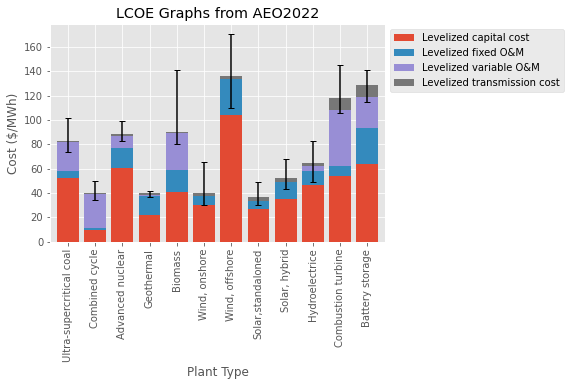

In [ ]:
matplotlib.style.use('ggplot') # Use the ggplot style to make your figure neat

disaggregaed_cost.plot(kind='bar', stacked=True, width=0.8, legend=True) # Create the stacked bar plot

plt.title("LCOE Graphs from AEO2022") # the title of the figure
plt.xlabel("Plant Type") # the title of x-axis
plt.ylabel("Cost ($/MWh)") # the title of x-axis

# Label the error bar 
plt.errorbar(x=ind, y=total_cost, yerr = errors, linestyle='', ecolor='black', capsize=3) #draw the error bar based on the total costs
# use "linestyle=''" to remove the error bar connecting line, use "ecolor=''" to set the color of error bar
# use "capsize=" to set the size of cap

plt.legend(bbox_to_anchor=(1, 1)) # use "bbox_to_anchor=" to set the location of legend, so taht it won't overlap with your figure

##5.(15%) 
Get information on China’s coal-fired power plants and explore whether retired plants tend to be smaller than the plants operating

Use the data contained in the excel file “China Power plant information-from end coal.xls” posted on Sakai. Build a table that shows for each province and operating status the average nameplate capacity (Put the provinces on the rows, the operating status on the columns, and in each cell, present the average name plate capacity of plants for that province & operating status. Based on this data, can we say that retirements of power plants in China have mainly affected smaller plants?

In [ ]:
pd.set_option('display.max_columns',None)

#access path where workbook is stored
path = "/content/gdrive/MyDrive/ENV716_F22_Solutions/A03/"

#Read file
df_china =pd.read_excel(path + "A3-Q5 China Power plant information-from end coal.xlsx", 
                        sheet_name="All-China",keep_default_na=False, header=0)

df_china.head()

,Unit,Plant,Other names,Sponsor,Capacity (MW),Status,Region,Country,Subnational unit
0,Anhui Bengbu power station Unit 1,Anhui Bengbu power station,,National Energy Investment Group,600,operating,East Asia,China,Anhui
1,Anhui Bengbu power station Unit 2,Anhui Bengbu power station,,National Energy Investment Group,600,operating,East Asia,China,Anhui
2,Anhui Bengbu power station Unit 3,Anhui Bengbu power station,,National Energy Investment Group,660,shelved,East Asia,China,Anhui
3,Anhui Bengbu power station Unit 4,Anhui Bengbu power station,,National Energy Investment Group,660,shelved,East Asia,China,Anhui
4,Anhui Huainan Panji power station Unit 1,Anhui Huainan Panji power station,,Huainan Mining Group,1000,shelved,East Asia,China,Anhui


In [ ]:
#Check data types
df_china.dtypes

Unit                object
Plant               object
Other names         object
Sponsor             object
Capacity (MW)        int64
Status              object
Region              object
Country             object
Subnational unit    object
dtype: object

In [ ]:
#Show for each province and operating status the average nameplate capacity
# Show provinces on the rows, the operating status on the columns, and in each cell, 
# present the average name plate capacity of plants for that province & operating status
# Provice Name: Subnational unit
# Operating Status: Status
# Nameplate Capacity: Capacity (MW)
#0. Convert capacity values to numeric
df_china['Capacity (MW)'] = pd.to_numeric(df_china['Capacity (MW)'])

#1. Create pivot table based on the instructions:
# provinces in the rows, status in the columns, and the average values of capacity in the cells
pt_china = pd.pivot_table(df_china, index="Subnational unit", columns='Status', values='Capacity (MW)', fill_value='', aggfunc='mean')
pt_china.head()


Status,announced,cancelled,construction,operating,permitted,pre-permit,retired,shelved
Subnational unit,,,,,,,,
Anhui,613.333333,1375.0,473.75,469.795918,1350.0,660.0,127.076923,760.769231
Beijing,,,,,,,147.105263,
Chongqing,350.0,1000.0,227.5,321.707317,,105.0,108.571429,188.0
Fujian,,886.666667,,493.22449,240.0,392.0,99.375000,674.0
Gansu,1000.0,805.0,535.714286,318.305085,,1000.0,71.400000,753.928571


In [ ]:
# To respond the question, would be easier to group the plants by status 
pd.pivot_table(df_china, index="Status", values='Capacity (MW)', fill_value='', aggfunc=['mean','min', 'max', np.std])


,mean,min,max,std
,Capacity (MW),Capacity (MW),Capacity (MW),Capacity (MW)
Status,,,,
announced,454.680851,30,1000,339.362787
cancelled,691.048951,50,6000,583.284344
construction,444.417021,30,1052,287.186389
operating,328.746751,30,1100,233.340157
permitted,444.404762,30,1350,349.044656
pre-permit,418.662791,30,1000,346.489474
retired,105.686062,30,425,61.901083
shelved,615.849493,30,2000,287.204538


> Do retirements of power plants in China have mainly affected smaller plants?
*R. We can see that the average capacity of the retired plants is smaller than 
the rest of the values. The maximum and std dev values confirm also tha the 
retirements have affected mainly the smaller plants.*

In [3]:
%%shell
jupyter nbconvert --to html "/content/gdrive/MyDrive/ENV716_F22_Solutions/A03/ENV716_A3_solution.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/ENV716_F22_Solutions/A03/ENV716_A3_solution.ipynb to html
[NbConvertApp] Writing 415624 bytes to /content/gdrive/MyDrive/ENV716_F22_Solutions/A03/ENV716_A3_solution.html
